In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

In [2]:
rv = binom(4, .5)
P_m = [rv.pmf(i) for i in range(5)]

In [3]:
def tet_sim_lethal_inf(N,time):
    # array to store fitness
    fits = np.zeros(time)
    fits[0] =.6
    #counts = np.array([int(.5*N),int(.5*N)])
    #intial fitness
    fit=0
    #initialize 'time ' counter
    dt= 1
    picks = np.array([0,0])
    # main loop
    while dt<time and picks[1]==0 :
        #draw a random set of four binary variables
        picks = np.bincount(np.random.randint(0,2,4),minlength=2)
        #counts -=picks
        # calc and store fitness - under rule in which one mutant subunit is lethal
        fits[dt] = (picks[1]==0)*1
        
        
        dt+= 1
    return fits



def tet_sim_const_inf(ftime,fit_loss ):
    
    fits =np.zeros(time)# initialize array for fitness
    fits[0]=.6
    tets = np.zeros(time)
    tets[0] =1
   
    fit_arr =np.ones(5)
    fit_arr[1:] =np.repeat(fit_loss,4)
    #counts = np.array([int(.5*N),int(.5*N)])
    # initialize time counter
    dt= 1 # initialize time counter
    picks = np.array([0,0]) # initalize variable for first step (might be extraneous)
    #thresh = .01
    fit = 0 # initial fitness
    # main loop
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2) #draw a random set of four binary variables
        #counts -=picks
        #tets[dt] = picks[1]
        #tets[dt] = np.random.randint(5)
        fit +=  fit_arr[int(picks[1])] #calculate fitness by constant model
        #print(fit)
        
        fits[dt] =fit/dt # store fitness
        tets[dt] = picks[1]
        
        dt+= 1 #advance time 
    return fits,tets
    
    
def tet_sim_lin_inf(time,fit_loss ):
    fits =np.zeros(time) # initialize array for fitness
    tets = np.zeros(time)
    fits[0]=1
    tets[0] =1
    #counts = np.array([int(.5*N),int(.5*N)])
    dt= 1 # initialize time counter
    picks = np.array([0,0]) # initalize variable for first step (might be extraneous)
    #thresh = .01
    fit = 0 # initial fitness
    fit_arr =np.ones(5)
    fit_arr =1-np.arange(5)*fit_loss/4
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2) #draw a random set of four binary variables
        #counts -=picks
        #tets[dt] = picks[1]
        #tets[dt] = np.random.randint(5)
        fit += fit_arr[int(picks[1])] #calculate fitness by linear model
        
        fits[dt] =fit/dt # store fitness
        tets[dt] = picks[1]
        
        
        dt+= 1  #advance time 
    return fits, tets

def tet_sim_geo_inf(time,fit_loss ):
    fits =np.zeros(time) # initialize array for fitness
    tets = np.zeros(time)
    fits[0]=1
    tets[0] =0
    #counts = np.array([int(.5*N),int(.5*N)])
    dt= 1 # initialize time counter
    picks = np.array([0,0]) # initalize variable for first step (might be extraneous)
    #thresh = .01
    fit = 0
    fit_arr =np.ones(5)
    fit_arr =(1- (fit_loss/2**4)*2**np.arange(5))
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2)
        #counts -=picks
        #tets[dt] = picks[1]
        #tets[dt] = np.random.randint(5,)
        fit += fit_arr[int(picks[1])] #calculate fitness by geometric model
        
        fits[dt] =fit/dt
        tets[dt] = picks[1]
        
        
        dt+= 1
    return fits, tets



# def tet_sim_const_inf_a(N,time,fit_loss ):
#     #fit_loss =1 - (avg_fit_loss*5-1) /5
#     fits =np.zeros(time)
#     fit_hist=np.zeros(time)
#     fits[0]=1
#     fit_hist[0] =1
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- (picks[1]!=0)*fit_loss)
#         #print(fit)
#         fit_hist[dt]= (1- (picks[1]!=0))*(fit_loss)
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits, fit_hist
    
    
# def tet_sim_lin_inf_a(N,time,avg_fit_loss ):
#     fits =np.zeros(time)
#     fit_hist=np.zeros(time)
#     tets = np.zeros(time)
#     fits[0]=1
#     tets[0] =0
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- picks[1]*fit_loss/4)
#         fit_hist[dt]= (1- picks[1]*fit_loss/4)
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits

# def tet_sim_geo_inf_a(N,time,avg_fit_loss ):
#     fits =np.zeros(time)
#     tets = np.zeros(time)
#     fits[0]=1
#     tets[0] =0
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- (fit_loss/2**4)*2**picks[1])
        
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits
    
    
    
    

In [1134]:
time= 100
samp =5000

arr_const_min=np.zeros((samp,2,time))
arr_lin_min=np.zeros((samp,2,time))
arr_geo_min=np.zeros((samp,2,time))

for n in range(samp):
    arr_const_min[n] = tet_sim_const_inf(time,.5 )
    arr_lin_min[n] = tet_sim_lin_inf(time,.5 )
    arr_geo_min[n] = tet_sim_geo_inf(time,.5 )
    
    
    

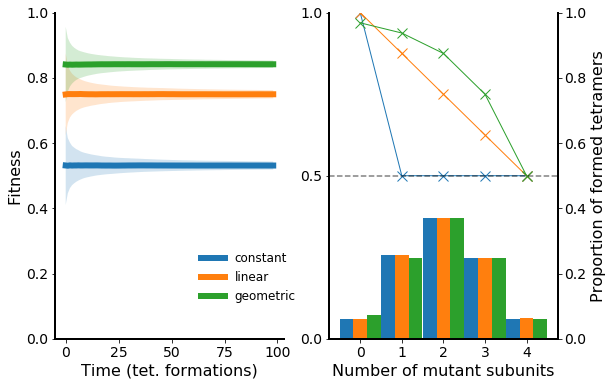

In [1135]:
fig,axs=plt.subplots(1,2,figsize=(9,6)) # 1 row, 2 columns
labels=['constant','linear','geometric'] # model labels


# left plot
ax=axs[0] 
for i,arr in enumerate([arr_const_min[:,0,:],arr_lin_min[:,0,:],arr_geo_min[:,0,:]]):
    ax.plot(np.mean(arr,axis=0)[1:],lw=6,label=labels[i]) # mean
    ax.fill_between(range(99),np.mean(arr,axis=0)[1:]-np.std(arr,axis=0)[1:],
                     np.std(arr,axis=0)[1:]+np.mean(arr,axis=0)[1:],alpha=.2) # std, as envelope
    
ax.set_xlabel('Time (tet. formations)',fontsize=16)
ax.set_ylabel('Fitness',fontsize=16)
ax.legend(fontsize=12,bbox_to_anchor=[1.1, .3],facecolor='w',frameon=False)
ax = axs[1]
ax2= ax.twinx()
for ax in [axs[0],axs[1]]:
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)


ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_ylim([0,1])
axs[0].set_ylim([0,1])
axs[1].set_ylim([0,1])

ax.plot(np.arange(5),[1,.5,.5,.5,.5],lw =1,label='constant',marker='x',markersize=10)
ax.plot(np.arange(5),1-np.arange(5)*.125,lw =1,label='linear',marker='x',markersize=10)
ax.plot(np.arange(5),1-2**np.arange(5)/32,lw =1,label='geometric',marker='x',markersize=10)


axs[1].set_yticks([0,.5,1])
offs = [-.33,0,+.33]
colors=['C0','C1','C2']
for i,arr in enumerate([arr_const_min,arr_lin_min,arr_geo_min]):
    #axs[1].axhline(np.mean(arr[:,0,:]),-.3,1,linestyle='--',alpha=.5,c=colors[i],clip_on =False)
    ax2.bar(np.arange(5)+offs[i],np.bincount(arr[:,1,:].flatten().astype(int))/len(arr[:,1,:].flatten().astype(int)),
           .33)

for side in ax2.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax2.spines[side].set_linewidth(2)


ax.set_xlabel('Number of mutant subunits',fontsize=16)
ax2.set_ylabel('Proportion of formed tetramers',fontsize=16)
ax2.set_xticks(np.arange(5))
axs[1].axhline(y=.5,linestyle='--',alpha=.5,color='k')


#ax.legend(fontsize=14,bbox_to_anchor=[1, .5])
#ax.set_xlabel('Time (tet. formations)',fontsize=16)
#ax.set_ylabel('Fitness',fontsize=16)
#ax.legend(fontsize=14,bbox_to_anchor=[1, .5])

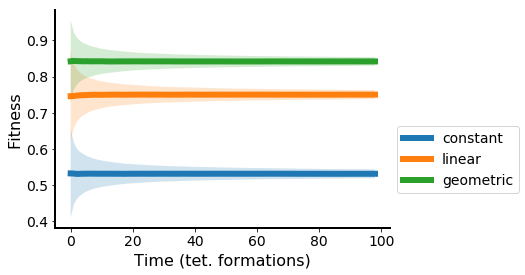

In [835]:

fig,ax=plt.subplots()
labels=['constant','linear','geometric']
for i,arr in enumerate([arr_const_min[:,0,:],arr_lin_min[:,0,:],arr_geo_min[:,0,:]]):
    ax.plot(np.mean(arr,axis=0)[1:],lw=6,label=labels[i])
    ax.fill_between(range(99),np.mean(arr,axis=0)[1:]-np.std(arr,axis=0)[1:],
                     np.std(arr,axis=0)[1:]+np.mean(arr,axis=0)[1:],alpha=.2)
for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax.spines[side].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_xlabel('Time (tet. formations)',fontsize=16)
ax.set_ylabel('Fitness',fontsize=16)
ax.legend(fontsize=14,bbox_to_anchor=[1, .5])

In [1046]:
np.random.random(time)M

array([0.62170422, 0.01646668, 0.96371407, ..., 0.01277845, 0.56917094,
       0.4403193 ])

In [622]:
np.all(Ne_arr==Ne_arr[0])

True

In [620]:
np.all(Ne_arr) ==Ne_arr[0]

False

In [708]:
def mut_pop_sim(N, Ne_arr, inits,fits_,time,rand_in):
    fits =np.copy(fits_)
    pop_hist = np.zeros((time,len(fits)+5)) #store population history

    P_mat = np.zeros((len(fits)+5,len(fits)+5)) # duplication matrix probability
    P_mat[:5,:5] =1
    P_mat[np.arange(5),np.arange(-5,0)[::-1]] =1
    P_mat[np.arange(-5,0),np.arange(-5,0)] =1
    P_mat[np.arange(-5,0)[::-1],np.arange(5)]=1-fits # death prob is 1-r
    pop = np.copy(inits) # feed in input for population
    #print(pop)

    #Ne = int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:])) # calculate vacancies ("average CC/")
    #pop[:5] = (Ne_arr - pop[5:])[::-1]
    #if np.all(Ne_arr==Ne_arr[0]):
    pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr -np.sum( pop[5:]))[::-1]
    #else:
    #    pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr -pop[5:])[::-1]
    #print(pop)
    #pop[0]=Ne # feed into population array
    pop_hist[0]=pop 
    # main loop

    #rands = np.random.random(time)
    rands = np.random.random(time)
    for dt in range(1,time):
        #cells = np.repeat(np.arange(-1,5),pop)

        picks = np.random.choice(np.repeat(np.arange(-5,5),pop),2)# pick two cells


        #picks = np.random.choice(np.arange(-1,5),2,p=pop/np.sum(pop))
        #print(picks)
        if  rands[dt]<P_mat[tuple(picks)] and pop[picks[1]+5]>0 and pop[picks[0]+5]>0 : # draw random number and continue if under prob. and cells are available
            #print('hi')
            pop[picks[1]+5]-=1 # kill chosen cell
            if picks[0]<=0:
                pop[picks[0]+5]+=1 # for wildtype, simple reproduce
            if picks[0]>0:
                pop[picks[0]+5]-=1 # for mutant, remove current cell type
                pop[np.random.randint(6,10)]+=2  # add two of new cell type for both daughter cells
        #if np.all(Ne_arr==Ne_arr[0]):
        pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr -np.sum( pop[5:]))[::-1]
        #else:
        #    pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr -pop[5:])[::-1]
        #tot = np.sum(pop[1:]) # total population
        #Ne = max(0,int(np.sum(Ne_arr*pop[1:]/tot) - tot)) # new effective (or average carrying capacity)
        #pop[0] = Ne

        pop_hist[dt] = pop # store 
    return pop_hist
            
        
        
        
    

In [712]:
skipss

[1, 29]

In [710]:
N=50
e=500
Ne_arr=np.zeros(5)
Ne_arr[1:]= N#+np.array([500,1000,1500,2000])
Ne_arr[0 ] =N
fits = np.array([.95,.949,.949,.949,.949])
time= 10000
inits= np.array([0,0,0,0,0,N-1,1,0,0,0])
#inits[1:] =(np.array(P_m)*N).astype(int)

In [711]:
samp = 50

arr_sameK = np.zeros((samp,time,len(fits)+5))
rand_inds  =np.random.random((samp,time))
skipss=[]
for n in range(samp):
    try:
        arr_sameK[n] = mut_pop_sim(N, Ne_arr, inits,fits,time,rand_inds[n])
    except:
        skipss.append(n)

In [703]:
N=50
e=500
Ne_arr=np.zeros(5)
Ne_arr[1:]= N+np.array([100,100,100,100])
Ne_arr[0 ] =N
fits = np.array([.95,.949,.949,.949,.949])
time= 10000
inits= np.array([0,0,0,0,0,N-1,1,0,0,0])
#inits[1:] =(np.array(P_m)*N).astype(int)

In [704]:
samp = 50
skipsd=[]
arr_diffK = np.zeros((samp,time,len(fits)+5))
rand_inds  =np.random.random((samp,time))
for n in range(samp):
    try:
        arr_diffK[n] = mut_pop_sim(N, Ne_arr, inits,fits,time,rand_inds[n])
    except:
        skipsd.append(n)
        

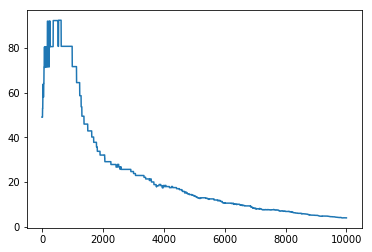

In [705]:

#plt.plot(np.mean(arr_sameK[:,:,5],axis=0)/np.mean(np.sum(arr_sameK[:,:,6:],axis=2),axis=0))
plt.plot(np.mean(arr_diffK[:,:,5],axis=0)/np.mean(np.sum(arr_diffK[:,:,6:],axis=2),axis=0))
#plt.plot(np.mean(np.sum(arr_diffK[:,:,6:],axis=2),axis=0))


In [706]:
skipsd

[1,
 2,
 3,
 4,
 5,
 7,
 9,
 10,
 11,
 13,
 15,
 16,
 17,
 18,
 20,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 42,
 45,
 46,
 47,
 48]

In [680]:
np.sum(arr_sameK[:,-1,6:],axis=1)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,
        0.,  0.,  0., 50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [67]:
P_mat[-1][1:]=0
P_mat[-2][2:]=0
P_mat[-2][:1]=0
P_mat[-3][3:]=0
P_mat[-3][:2]=0
P_mat[-4][4:]=0
P_mat[-4][:3]=0
P_mat[-5][5:]=0
P_mat[-5][:4]=0


In [1750]:
np.all(picks>0)

False

In [1598]:
    pop = np.copy(inits) # feed in input for population

    #Ne = int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:])) # calculate vacancies ("average CC/")
    pop[:5] = Ne_arr - pop[5:]

In [579]:
N=50
e=500
Ne_arr=np.zeros(5)
Ne_arr[1:]= N #+np.array([50,50,50,50])
Ne_arr[0 ] =N
fits_ = np.array([.95,.949,.949,.949,.949])
time= 5000
inits= np.array([0,0,0,0,0,int(N/2),int(N/2),0,0,0])

In [581]:
fits =np.copy(fits_)
pop_hist = np.zeros((time,len(fits)+5)) #store population history

P_mat = np.zeros((len(fits)+5,len(fits)+5)) # duplication matrix probability
P_mat[np.arange(5),np.arange(5)] =1
P_mat[np.arange(5),np.arange(-5,0)[::-1]] =1
P_mat[np.arange(-5,0),np.arange(-5,0)] =1
P_mat[np.arange(-5,0)[::-1],np.arange(5)]=1-fits # death prob is 1-r
pop = np.copy(inits) # feed in input for population
#print(pop)

#Ne = int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:])) # calculate vacancies ("average CC/")
#pop[:5] = (Ne_arr - pop[5:])[::-1]
if np.all(Ne_arr) !=Ne_arr[0]:
    pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr -np.sum( pop[5:]))[::-1]
else:
    pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr -pop[5:])[::-1]
#print(pop)
#pop[0]=Ne # feed into population array
pop_hist[0]=pop 
# main loop

#rands = np.random.random(time)
rands = np.random.random(time)
for dt in range(1,time):
    #cells = np.repeat(np.arange(-1,5),pop)
    
    picks = np.random.choice(np.repeat(np.arange(-5,5),pop),2)# pick two cells


    #picks = np.random.choice(np.arange(-1,5),2,p=pop/np.sum(pop))
    #print(picks)
    if  rands[dt]<P_mat[tuple(picks)] and pop[picks[1]+5]>0 and pop[picks[0]+5]>0 : # draw random number and continue if under prob. and cells are available
        #print('hi')
        pop[picks[1]+5]-=1 # kill chosen cell
        if picks[0]<=0:
            pop[picks[0]+5]+=1 # for wildtype, simple reproduce
        if picks[0]>0:
            pop[picks[0]+5]-=1 # for mutant, remove current cell type
            pop[np.random.randint(6,10)]+=2  # add two of new cell type for both daughter cells
    if np.all(Ne_arr) !=Ne_arr[0]:
        pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr -np.sum( pop[5:]))[::-1]
    else:
        pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr -pop[5:])[::-1]
    #tot = np.sum(pop[1:]) # total population
    #Ne = max(0,int(np.sum(Ne_arr*pop[1:]/tot) - tot)) # new effective (or average carrying capacity)
    #pop[0] = Ne

    pop_hist[dt] = pop # store 

In [577]:
np.all(Ne_arr) ==Ne_arr[0]:

False

In [556]:
pop_hist[4835]

array([ 0.,  0.,  0.,  0.,  0., 25.,  7.,  6.,  6.,  6.])

In [551]:
pop_hist[4834]

array([14.,  0., 10., 12.,  0., 50., 38., 40., 50., 36.])

In [502]:
pop_hist[14]

array([ 0., 49.,  0., 50.,  0., 26., 24.,  0.,  0.,  0.])

In [495]:
(Ne_arr - np.sum(pop_hist[15][5:]))[::-1][ (pop_hist[14][:5]>0)[::-1]]

array([49.])

In [496]:
np.zeros(5)[ (pop_hist[14][:5]>0)[::-1]] = 

array([0.])

In [499]:
[ (pop_hist[14][:5]>0)[::-1]] 

[array([False,  True, False, False, False])]

In [1691]:
Ne_arr - pop[5:]

array([ 0., 49., 50., 50., 50.])

In [1705]:
P_mat[np.arange(5),np.arange(-5,0)[::-1]] =1

array([-1, -2, -3, -4, -5])

In [1731]:
 pop[:5] = (Ne_arr - pop[5:])[::-1]

In [1730]:
Ne_arr

array([  50., 1050., 1050., 1050., 1050.])

In [1732]:
pop

array([1050, 1050, 1050, 1049,    1,   49,    1,    0,    0,    0])

In [138]:
pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr - np.sum(pop[5:]))[::-1]

In [139]:
pop


array([   0,    0,    0, 1000,    0,   25,   25,    0,    0,    0])

In [129]:
    pop = np.copy(inits) # feed in input for population

    #Ne = int(np.sum(Ne_arr*pop[1:]/np.sum(pop[1:])) - np.sum(pop[1:])) # calculate vacancies ("average CC/")
    #pop[:5] = (Ne_arr - pop[5:])[::-1]
    pop[:5] =  (pop[5:]>0)[::-1]*(Ne_arr - pop[5:])[::-1]
    #pop[0]=Ne # feed into population array